In [1]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/sample_data/Position_Salaries.csv') 
data.head(8)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000


In [3]:
#Seleccionamos solo los valores quitando la posición
X = data.iloc[:, 1:2].values#Elejimos la columna 'Level' la extraemos como una matriz y no como un arreglo
y = data.iloc[:, -1].values#Columna 'Salary' es la columna dependiente

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

In [5]:
from sklearn.svm import SVR

regression = SVR(kernel = "rbf")
regression.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [6]:
y_pred = regression.predict(sc_X.transform(np.array([[6.5]])))
y_pred = sc_y.inverse_transform([y_pred])
y_pred

array([[170370.0204065]])

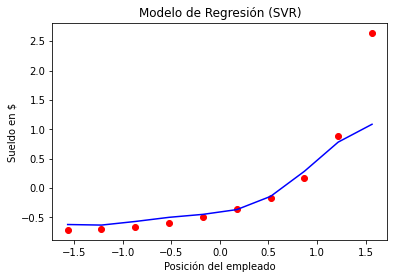

In [7]:
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo en $")
plt.show()

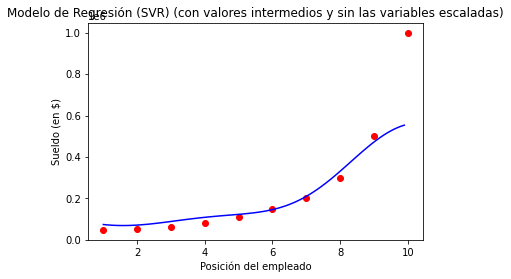

In [8]:
X_2 = sc_X.inverse_transform(X)
y_2 = sc_y.inverse_transform(y)
X_grid = np.arange(min(X_2), max(X_2), 0.1)
X_grid = X_grid.reshape(-1, 1)
plt.scatter(X_2, y_2, color = "red")
plt.plot(X_grid, sc_y.inverse_transform(regression.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = "blue")
plt.title("Modelo de Regresión (SVR) (con valores intermedios y sin las variables escaladas)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

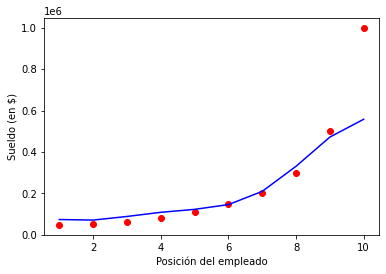

In [9]:
# Visualización de los resultados del SVR (sin valores intermedios y sin las variables escaladas)
X_1 = sc_X.inverse_transform(X)
y_1 = sc_y.inverse_transform(y)
plt.scatter(X_1, y_1, color = "red")
plt.plot(X_1, sc_y.inverse_transform(regression.predict(sc_X.transform(X_1)).reshape(-1, 1)), color = "blue")
#plt.title("Modelo de Regresión (SVR) (sin valores intermedios y sin las variables escaladas)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()